In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

In [6]:
X = data.data
y = data.target

In [7]:
gaussian_nb = GaussianNB()

In [8]:
gaussian_nb.fit(X, y)

GaussianNB()

In [11]:
y_pred = gaussian_nb.predict(X)

In [12]:
confusion_matrix(y, y_pred)

array([[189,  23],
       [ 10, 347]])

In [13]:
accuracy_score(y, y_pred)

0.9420035149384886

In [14]:
f1_score(y, y_pred)

0.9546079779917468

In [ ]:
f1_score

In [15]:
roc_curve(y, y_pred)

(array([0.        , 0.10849057, 1.        ]),
 array([0.       , 0.9719888, 1.       ]),
 array([2, 1, 0]))

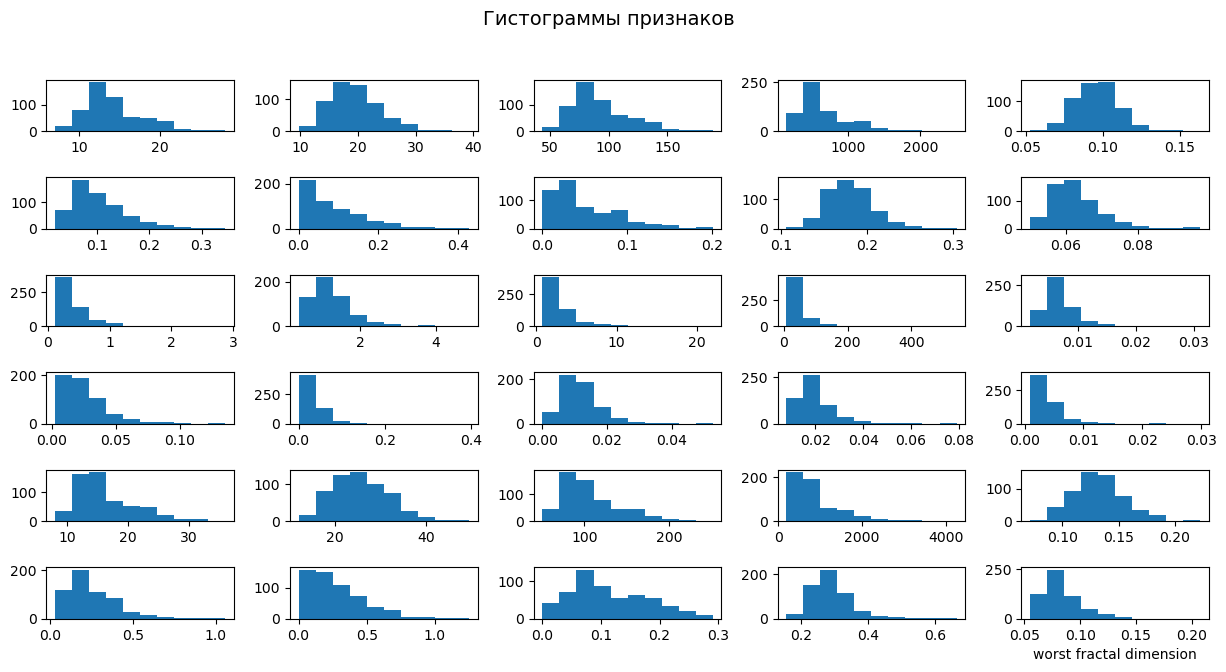

In [9]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

### 1.На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

Мультономинальный классификатор 

In [78]:
multinomial_nb = MultinomialNB()

In [79]:
multinomial_nb.fit(X, y)

MultinomialNB()

In [90]:
y_pred = multinomial_nb.predict(X)

In [91]:
confusion_matrix(y, y_pred)

array([[163,  49],
       [ 10, 347]])

In [92]:
accuracy_score(y, y_pred)

0.8963093145869947

In [93]:
f1_score(y, y_pred)

0.9216467463479415

Бернулли

In [97]:
bernoulli_nb = BernoulliNB()

In [98]:
bernoulli_nb.fit(X, y)

BernoulliNB()

In [101]:
y_pred = bernoulli_nb.predict(X)

In [102]:
accuracy_score(y, y_pred)

0.6274165202108963

In [103]:
f1_score(y, y_pred)

0.7710583153347732

In [104]:
confusion_matrix(y, y_pred)

array([[  0, 212],
       [  0, 357]])

Категориальный

In [117]:
categorical_nb  = CategoricalNB()

In [118]:
categorical_nb.fit(X, y)

CategoricalNB()

In [119]:
y_pred = categorical_nb.predict(X)

In [120]:
accuracy_score(y, y_pred)

0.9595782073813708

In [121]:
f1_score(y, y_pred)

0.9685362517099864

In [122]:
confusion_matrix(y, y_pred)

array([[192,  20],
       [  3, 354]])

Комплементарный

In [132]:
complement_nb = ComplementNB()

In [133]:
complement_nb.fit(X, y)

ComplementNB()

In [134]:
y_pred = complement_nb.predict(X)

In [135]:
accuracy_score(y, y_pred)

0.8945518453427065

In [136]:
f1_score(y, y_pred)

0.9202127659574469

In [137]:
confusion_matrix(y, y_pred)

array([[163,  49],
       [ 11, 346]])

### 2.Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [150]:
data1 = pd.read_csv('titanic.csv')
Y = data1['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [149]:
X = data1.iloc[:, data1.columns != data1.columns[1]]

In [151]:
data1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked_C     False
Embarked_Q     False
Embarked_S     False
dtype: bool

In [153]:
gaussianb = GaussianNB()

In [154]:
gaussianb.fit(X, Y)

GaussianNB()

In [158]:
y_pred = gaussianb.predict(X)

In [156]:
accuracy_score(Y, y_pred)

0.7845117845117845

In [159]:
f1_score(Y, y_pred)

0.7201166180758017

In [174]:
bernoullinb = BernoulliNB()

In [175]:
bernoullinb.fit(X, Y)

BernoulliNB()

In [176]:
y1_pred = bernoullinb.predict(X)

In [177]:
accuracy_score(Y, y1_pred)

0.7845117845117845

In [178]:
f1_score(Y, y1_pred)

0.7159763313609468

In [21]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)


array([[-5.51629264,  8.04763857],
       [-6.03989846,  8.76108988],
       [-5.53647888,  7.26932177],
       [-5.90036714,  8.99683108],
       [-5.48509529,  7.28269814],
       [-5.70366816,  7.65603476],
       [-5.55882104,  7.37227395],
       [-5.78655286,  8.90615759],
       [-5.30025769,  8.46071981],
       [-5.75777193,  8.88900351],
       [-6.0001514 ,  8.33197242],
       [-5.60296911,  8.42214089],
       [-5.09958017,  8.15757853],
       [-6.09662219,  8.83310007],
       [-5.16156065,  7.69961463],
       [-5.88654015,  8.47190522],
       [-6.1646084 ,  7.67258513],
       [-6.38992615,  8.09639207],
       [-5.92382954,  7.17799146],
       [-5.24291525,  7.16201747],
       [-5.90848249,  9.27626087],
       [-6.22605199,  7.13457451],
       [-5.4098797 ,  8.56999432],
       [-5.86809486,  8.33179111],
       [-5.90888825,  7.24564295],
       [-4.5878281 ,  7.31380927],
       [-5.82532162,  8.51439355],
       [-5.95237973,  7.07190486],
       [-6.03724242,